In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [7]:
df=pd.read_csv('./sample_data/Reviews.csv',quoting=3, error_bad_lines=False)

Streaming output truncated to the last 5000 lines.
Skipping line 55185: expected 10 fields, saw 15
Skipping line 55186: expected 10 fields, saw 15
Skipping line 55187: expected 10 fields, saw 15
Skipping line 55188: expected 10 fields, saw 11
Skipping line 55189: expected 10 fields, saw 14
Skipping line 55190: expected 10 fields, saw 11
Skipping line 55192: expected 10 fields, saw 12
Skipping line 55196: expected 10 fields, saw 12
Skipping line 55199: expected 10 fields, saw 19
Skipping line 55200: expected 10 fields, saw 11
Skipping line 55201: expected 10 fields, saw 13
Skipping line 55203: expected 10 fields, saw 12
Skipping line 55204: expected 10 fields, saw 12
Skipping line 55205: expected 10 fields, saw 11
Skipping line 55206: expected 10 fields, saw 14
Skipping line 55208: expected 10 fields, saw 14
Skipping line 55209: expected 10 fields, saw 11
Skipping line 55210: expected 10 fields, saw 11
Skipping line 55211: expected 10 fields, saw 13
Skipping line 55215: expected 10 fiel

In [55]:
df=df.head(500)


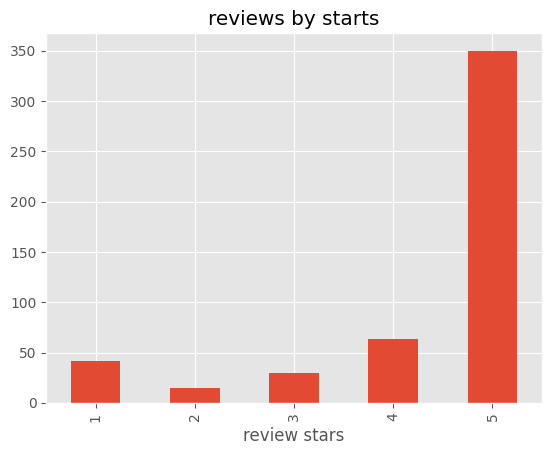

In [14]:
ax=df['Score'].value_counts().sort_index().plot (kind="bar",title="reviews by starts")
ax.set_xlabel("review stars")
plt.show()

In [15]:
example =df['Text'][50]
print(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


In [19]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['AWESOME', '!', '!', '!', 'such', 'a', 'yummy', 'flavor', 'I', 'got']

In [24]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('AWESOME', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('yummy', 'JJ'),
 ('flavor', 'NN'),
 ('I', 'PRP'),
 ('got', 'VBD')]

In [34]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  AWESOME/RB
  !/.
  !/.
  !/.
  such/PDT
  a/DT
  yummy/JJ
  flavor/NN
  I/PRP
  got/VBD
  it/PRP
  as/IN
  a/DT
  healthy/JJ
  alternative/NN
  to/TO
  the/DT
  desserts/NNS
  we/PRP
  normally/RB
  eat/VBP
  and/CC
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  that/IN
  I/PRP
  did/VBD
  there/EX
  are/VBP
  so/RB
  many/JJ
  things/NNS
  you/PRP
  can/MD
  do/VB
  with/IN
  (PERSON Jello/NNP)
  desserts/NNS
  and/CC
  still/RB
  have/VB
  them/PRP
  taste/VB
  good/JJ
  and/CC
  be/VB
  good/JJ
  for/IN
  you/PRP
  ./.
  I/PRP
  will/MD
  definitentally/RB
  be/VB
  purchasing/VBG
  this/DT
  product/NN
  again/RB
  the/DT
  flavor/NN
  was/VBD
  so/RB
  wonderful/JJ
  ./.)


VADER MODEL

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [46]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [47]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [58]:

res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)
  


  0%|          | 0/500 [00:00<?, ?it/s]

In [68]:
vaders=pd.DataFrame(res).T

vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


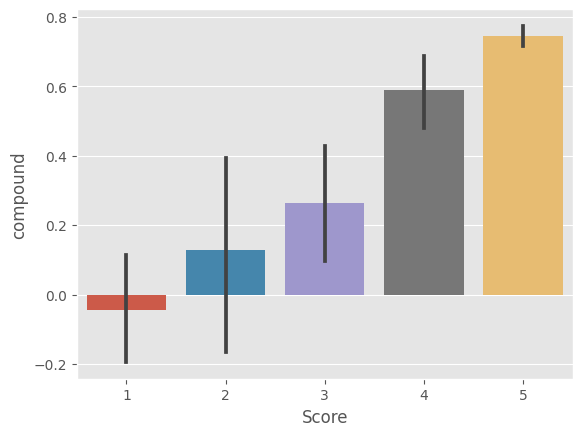

In [70]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title=("compunf scores")

plt.show()

<Axes: xlabel='Score', ylabel='neg'>

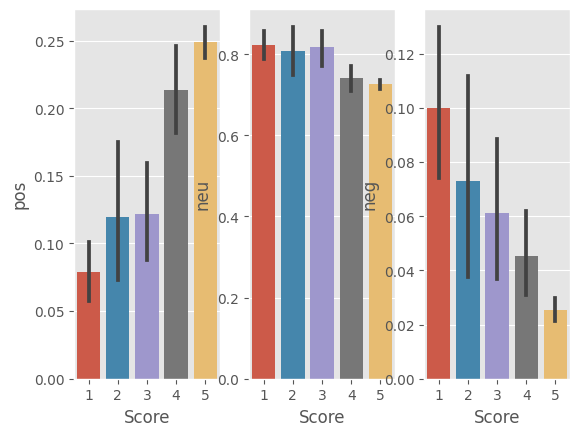

In [75]:

fig,axs=plt.subplots(1,3)
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])

Roberta Pretrained model

In [77]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.7 MB/s eta 0:00:00


In [79]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [80]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [82]:
print(example)
sia.polarity_scores(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [89]:
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_positive':scores[2]

}
print(scores_dict)

{'roberta_neg': 0.0016300853, 'roberta_neu': 0.0053900587, 'roberta_positive': 0.9929798}


In [92]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores
  scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_positive':scores[2]

  }
  return scores_dict


In [101]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)

    roberta_results=polarity_scores_roberta(text)
    both={**vader_result,**roberta_results}
    res[myid]=both
  except RuntimeError:
    print(f'broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [102]:
both

{'neg': 0.0,
 'neu': 0.798,
 'pos': 0.202,
 'compound': 0.765,
 'roberta_neg': 0.001797795,
 'roberta_neu': 0.009124884,
 'roberta_positive': 0.9890773}

In [103]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.489172,0.465882,0.044946,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,0.003874,0.094156,0.901970,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,0.003103,0.055912,0.940984,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
# comparing scores

In [104]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_positive', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

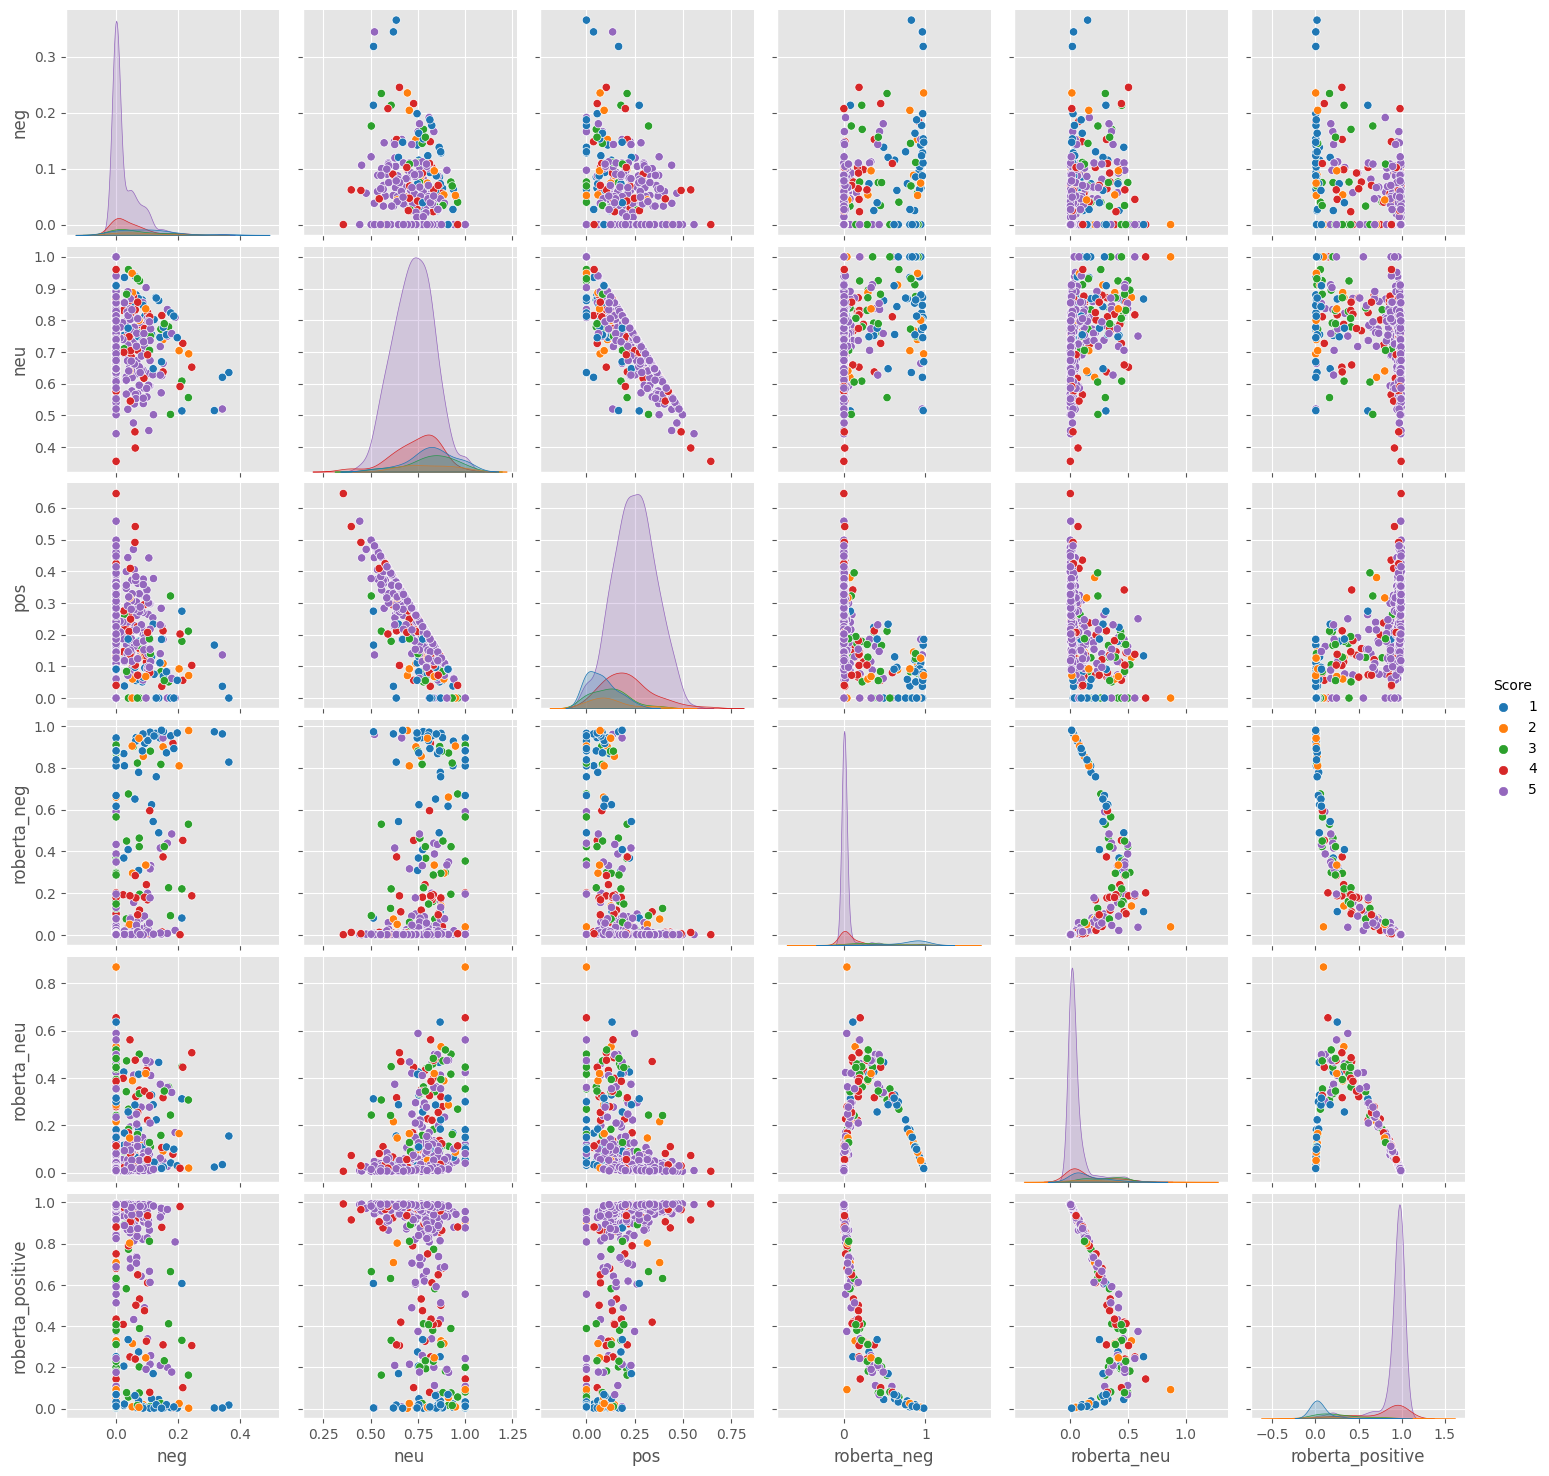

In [107]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_positive'],
            hue='Score',
            palette='tab10')
plt.show()

In [109]:
results_df.query('Score == 1') \
    .sort_values('roberta_positive', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [114]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [116]:
sent_pipeline('thats bad')

[{'label': 'NEGATIVE', 'score': 0.9997972846031189}]